# Equations of Motion

$$ d_A =  \sqrt{x^2 + (y-L/\sqrt{3})^2} $$
$$ d_B = \sqrt{(x+0.5L)^2+(y+\frac{L}{2\sqrt{3}})^2} $$
$$ d_C = \sqrt{(x - 0.5L)^2+(y+\frac{L}{2\sqrt{3}})^2} $$

$$ F_{Ax} = k_1(L_1 - d_A)x $$
$$ F_{Bx} = k_2(L_2 - b_B)(0.5L+x) $$
$$ F_{Cx}  = k_3(L_3 - d_C)(x - 0.5L)$$

$$ F_{Ay} = k_1(L_1 - d_A)(y - L/\sqrt{3}) $$
$$ F_{By} = k_2(L_2 - d_B)(y + \frac{L}{2\sqrt{3}}) $$
$$ F_{Cy} = k_3(L_3 - d_C)(y + \frac{L}{2\sqrt{3}}) $$

$$ F_{Ax} + F_{Bx} + F_{Cx} = m\ddot{x} $$
$$ F_{Ay} + F_{By} + F_{Cy} = m\ddot{y} $$

In [1]:
using DifferentialEquations
using Plots
using LinearAlgebra

In [51]:
L = 10

A = [0,L/sqrt(3)]
B = [-0.5*L, -0.5*L/sqrt(3)]
C = [0.5*L, -0.5*L/sqrt(3)]

eq1 = 6
eq2 = 8
eq3 = 9

m = 5

k1 = 5.
k2 = 1.5
k3 = 2.

u0 = [1,4.]
du0 = [0.,0.]

tspan = [0.0,100.]

2-element Vector{Float64}:
   0.0
 100.0

In [52]:
function tri_spring!(ddu, du, u, p, t)
    d_a = norm(u-A)
    d_b = norm(u-B)
    d_c = norm(u-C)
    
    F_Ax = -k1*(eq1-d_a)*(A[1] - u[1])
    F_Bx = -k2*(eq2-d_b)*(B[1] - u[1])
    F_Cx = -k3*(eq3-d_c)*(C[1] - u[1])
    
    ddu[1] = (1/m)*(F_Ax + F_Bx + F_Cx)

    F_Ay = -k1*(eq1-d_a)*(A[2] - u[2])
    F_By = -k2*(eq2-d_b)*(B[2] - u[2])
    F_Cy = -k3*(eq3-d_c)*(C[2] - u[2])
    
    ddu[2] = (1/m)*(F_Ay + F_By + F_Cy)
end

tri_spring! (generic function with 1 method)

In [53]:
prob = SecondOrderODEProblem(tri_spring!, du0, u0, tspan);
sol = solve(prob, saveat=0.1);

In [54]:
function plot_tri(sol, idx)
    
    tri = collect(zip(A,B,C))
    tri_x,tri_y = map(collect, tri)
    
    scatter(tri_x,tri_y, markersize=8)
    
    x = sol[idx][3]
    y = sol[idx][4]
    
    plot!([x,A[1]], [y,A[2]], color="blue")
    plot!([x,B[1]], [y,B[2]], color="blue")
    plot!([x,C[1]], [y,C[2]], color="blue")
    
    plot!(sol[3,1:idx], sol[4,1:idx], color="green")
    scatter!([x], [y], color="green", markersize=8, legend=false, axis=([], false))
    
end

plot_tri (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = /Users/mszma1/workspace/julia/3spring/anim.gif
└ @ Plots /Users/mszma1/.julia/packages/Plots/rDbWY/src/animation.jl:114


Plots.AnimatedGif("/Users/mszma1/workspace/julia/3spring/anim.gif")
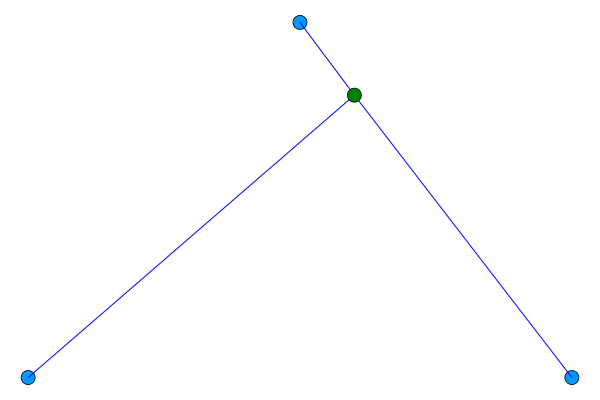

In [55]:
anim = @animate for i in 1:length(sol)
   
    plot_tri(sol,i)
    
end

gif(anim, "anim.gif", fps = 30)